Suppose you're given the following information about a population and its wealth distribution:

Population size: 2500
Mean income (in USD, thousands): 50
Standard deviation of income (in USD, thousands): 12.5
The population wealth is initially normally distributed
Additionally, you're told that economic transactions occur randomly between two individuals in the population. In a transaction, two parties come together and there is an exchange of wealth. For the purposes of this question, the transactions can be modeled in the following way:

Two individuals come together at random
When they interact, their wealth is put into a pot, and is then split randomly and uniformly between the two parties
Given this information, write a simulation to show how the wealth of the population will change over time. You can simulate 50 time steps (or transactions per individual).

In [37]:
import numpy as np
import pandas as pd

In [38]:
N = 2_500
miu = 50
sigma = 12.5

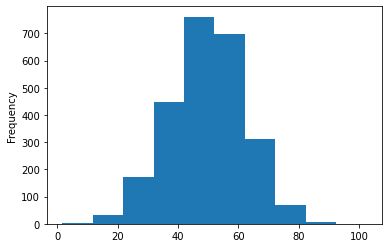

In [39]:
wealth = np.random.normal(miu, sigma, N)
pd.Series(wealth).plot.hist()

In [52]:
def execute_transaction(ind1):
  ind2 = ind1
  while ind1 == ind2:
    ind2 = np.random.choice(np.arange(len(wealth)), 1, replace=False)

  pot = wealth[ind1] + wealth[ind2]
  wealth[ind1] = pot * np.random.randint(0, 1_0001) / 10_000
  wealth[ind2] = pot - wealth[ind1]

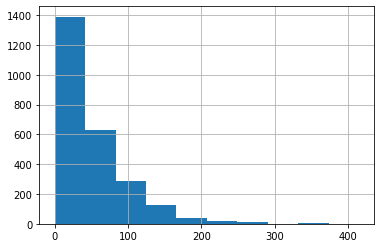

In [54]:
wealth = np.random.normal(miu, sigma, N)

for ind1 in range(len(wealth)):
  for _ in range(50):
    execute_transaction(ind1)

pd.Series(wealth).hist()